# Sepsis Prediction

Sepsis is the body's severe reaction to infection. It's a life-threatening medical emergency. Sepsis occurs when an existing infection sets off a chain reaction that spreads throughout the body. Most cases of sepsis begin before a patient enters the hospital. Sepsis-causing infections typically begin in the lung, urinary tract, skin, or gastrointestinal tract. Without prompt treatment, sepsis can quickly cause tissue damage, organ failure, and death.

# BUSINESS UNDERSTANDING

Recognizing the vital need of early identification and action in sepsis, a life-threatening illness, this project aims to use machine learning and a predictive API deployment to provide healthcare practitioners with a tool to detect at-risk patients. 


## Dataset Overview
The sepsis dataset comprises patient records with comprehensive clinical features, including:

- **ID**: Unique patient identification number.
- **PRG**: Plasma glucose level.
- **PL**: Blood work result 1 (mu U/ml).
- **PR**: Blood pressure (mm Hg).
- **SK**: Blood work result 2 (mm).
- **TS**: Blood work result 3 (mu U/ml).
- **M11**: Body mass index (weight in kg/(height in m)²).
- **BD2**: Blood work result 4 (mu U/ml).
- **Age**: Patient’s age (years).
- **Insurance**: Indication of whether the patient holds a valid insurance card.
- **Sepsis**: Classification indicating whether the patient has sepsis (Positive) or not (Negative).

# Analytical Questions

1.  How are the numerical variables correlated with each other?
2.  What is the distribution of ages in the dataset?
3.  How many patients have insurance?
4. How does insurance status relate to the occurrence of Sepsis?
5. How does Pregnancy (PRG) vary with Sepsis?
6. What is the distribution of plasma glucose concentration in the dataset?
7. How does serum insulin (M11) vary between patients with and without sepsis?

##             HYPOTHESIS

* Null Hypothesis (H0): There is no association between having insurance and the occurrence of sepsis.
* Alternative Hypothesis (H1): There is an association between having insurance and the occurrence of sepsis.

In [201]:
# load necessay packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier




# visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [151]:
#load data
data = pd.read_csv("datasets/Paitients_Files_Train 1.csv")

#preview data
data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [152]:
# set index to a specific column
data.set_index('ID', inplace=True)

data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


### DATA UNDERSTANDING

In [153]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


In [155]:
# check for null values
data.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no null values in the dataset

In [156]:
# check for duplicates
data.duplicated().sum()

0

# Univariate Analysis

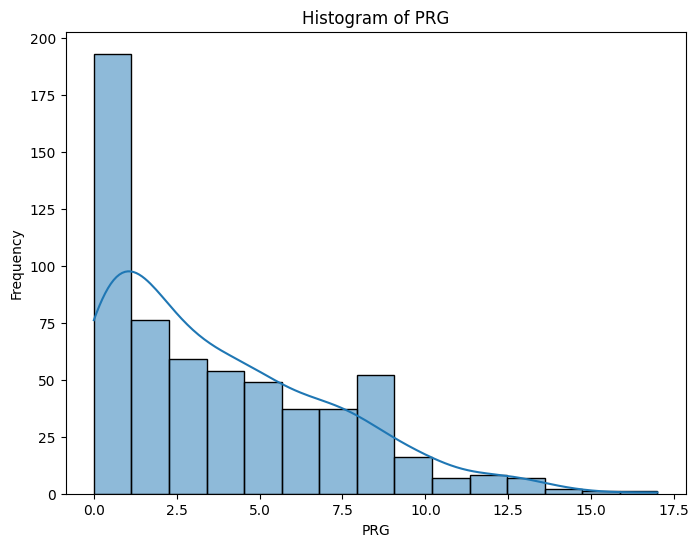

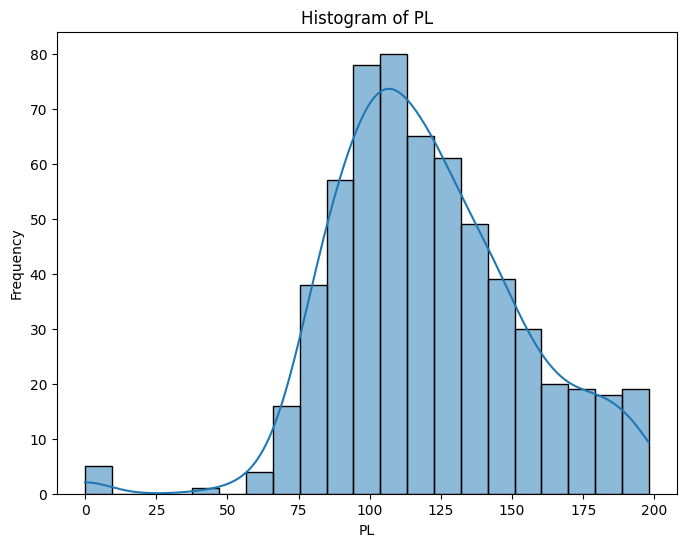

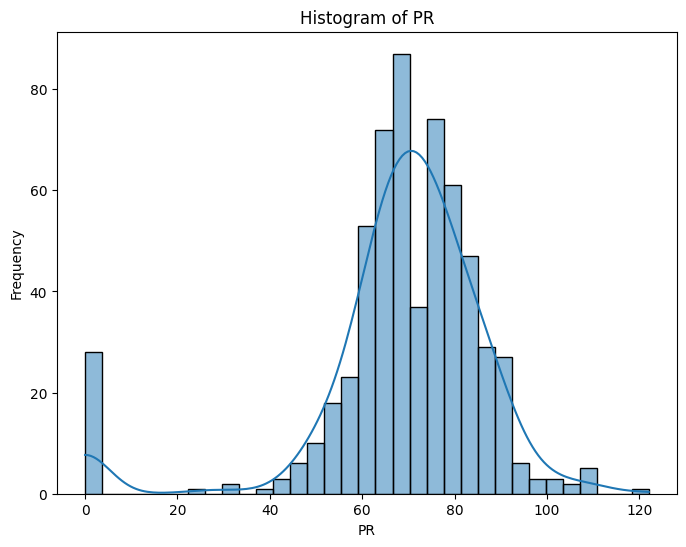

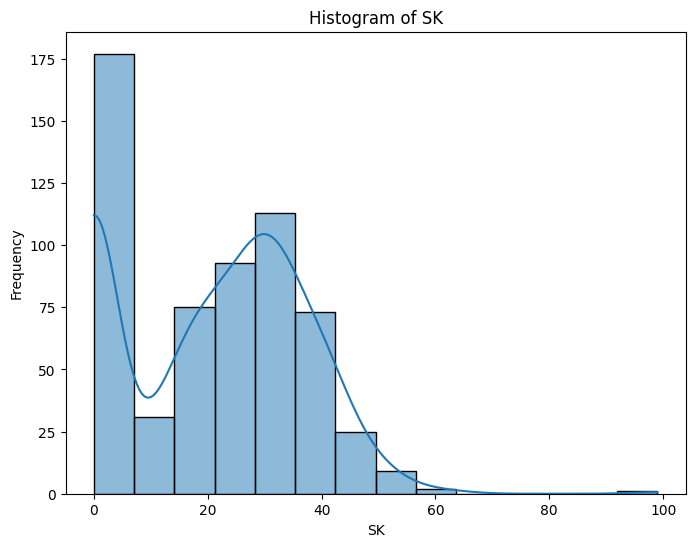

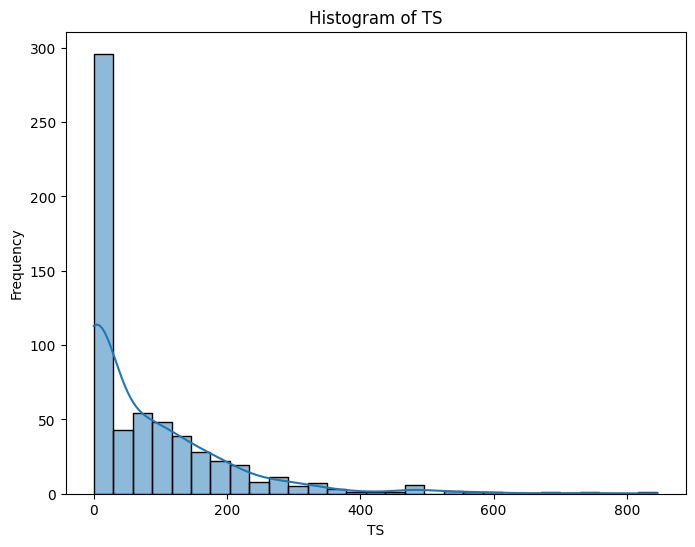

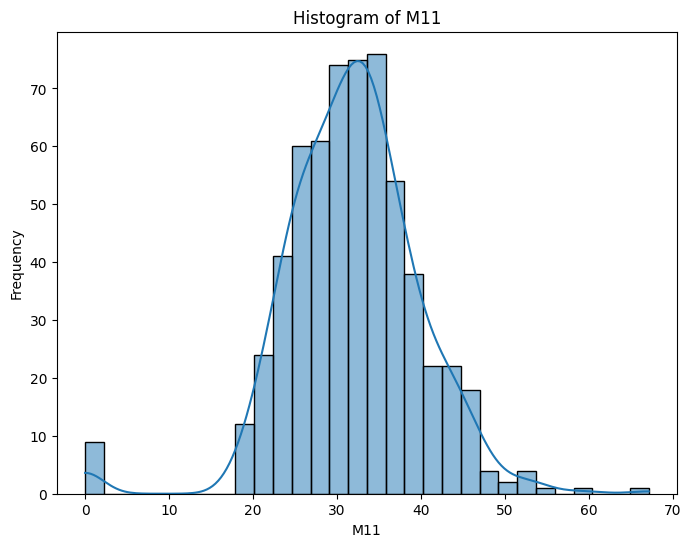

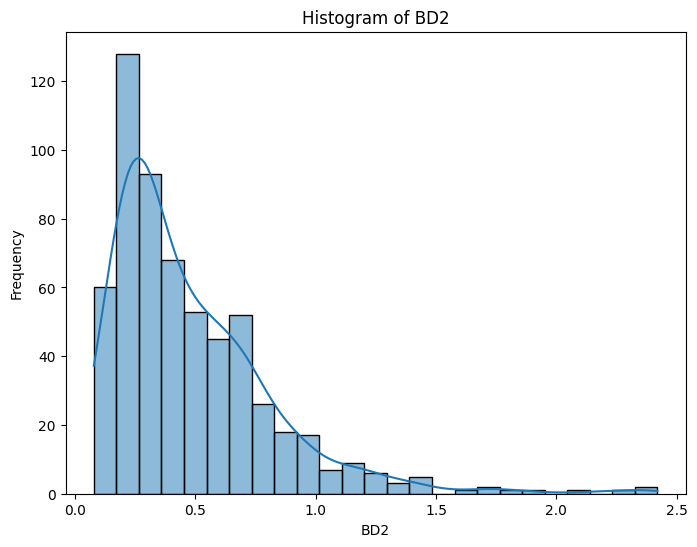

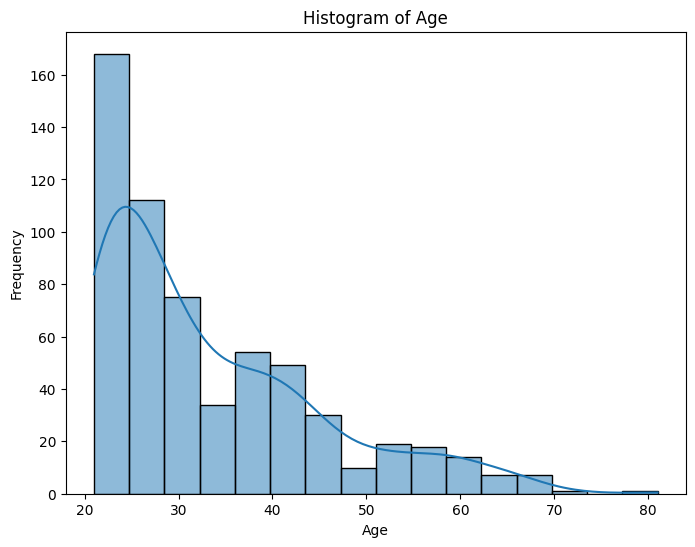

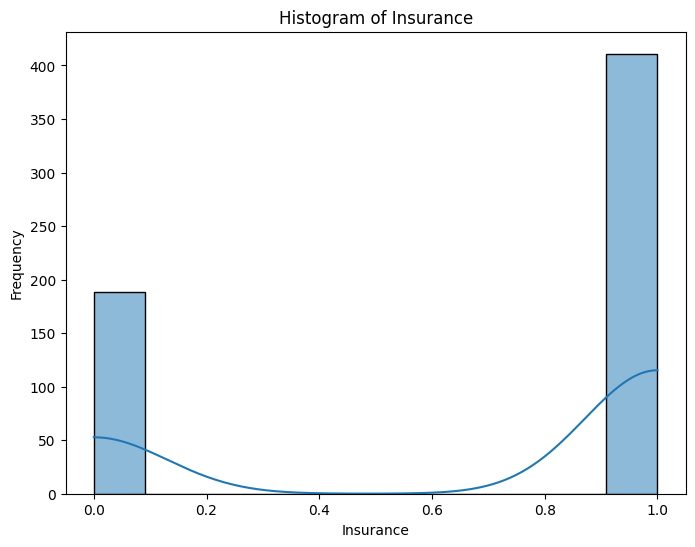

In [157]:
# Histograms
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

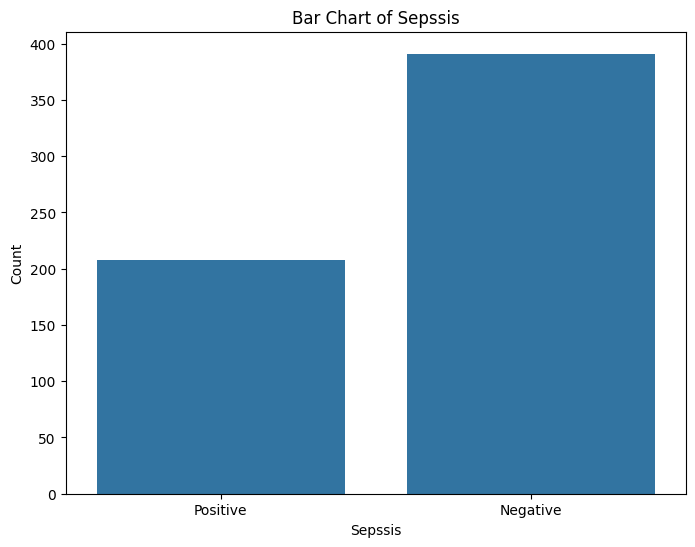

In [158]:

# Bar Charts (for categorical variables)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

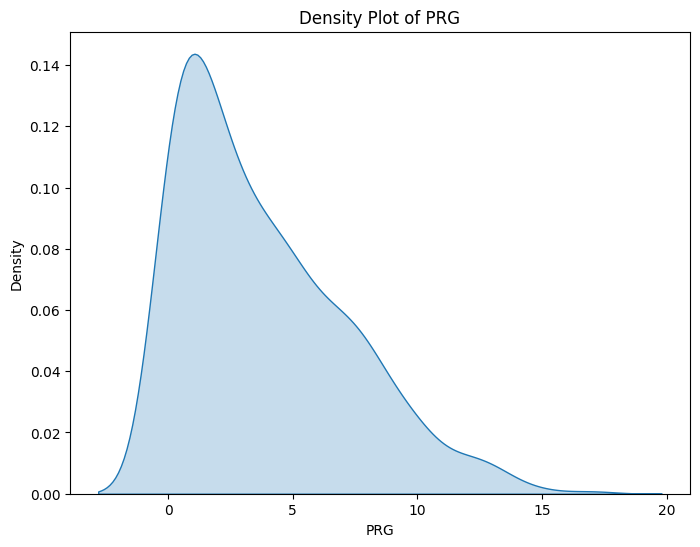

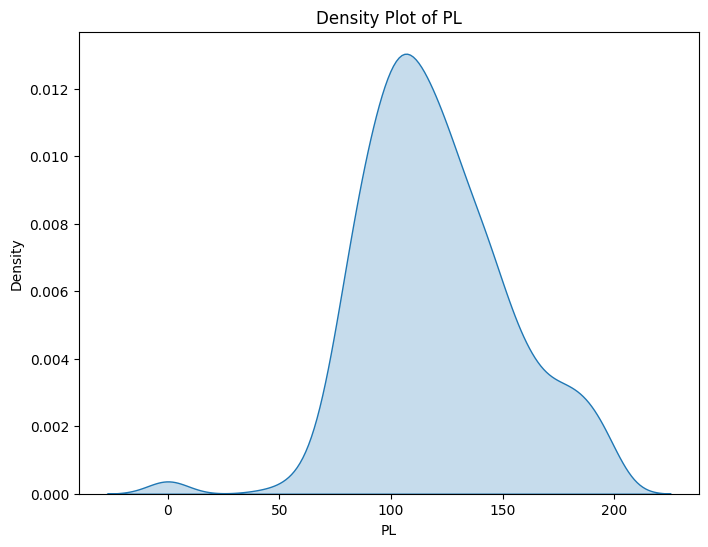

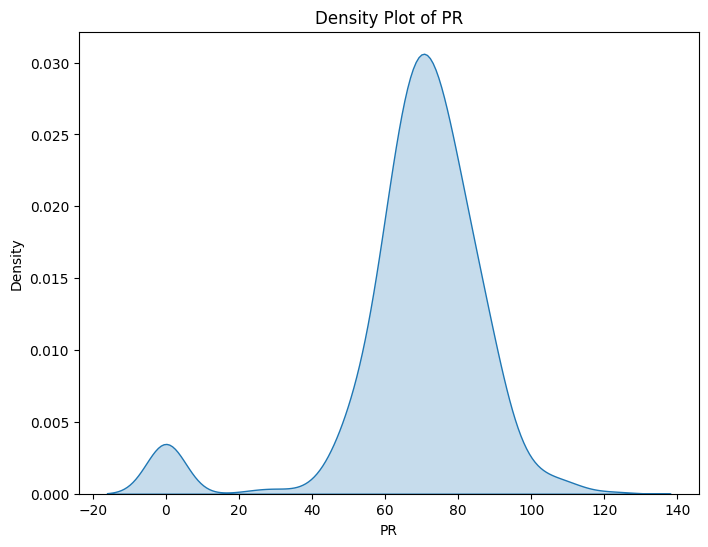

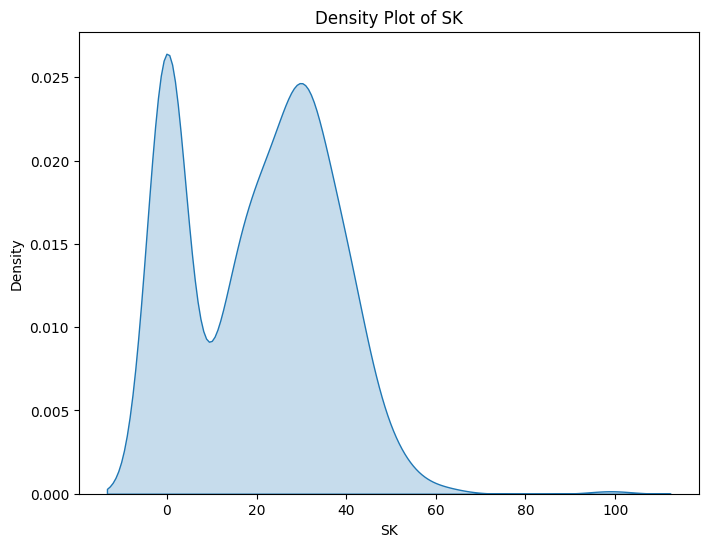

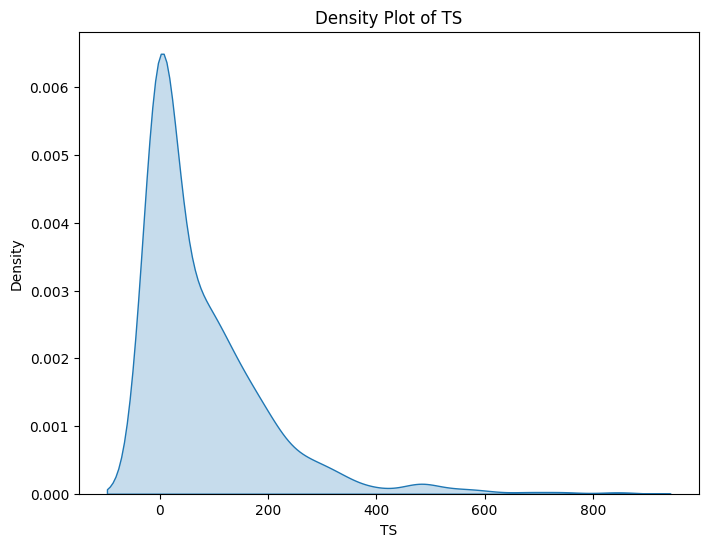

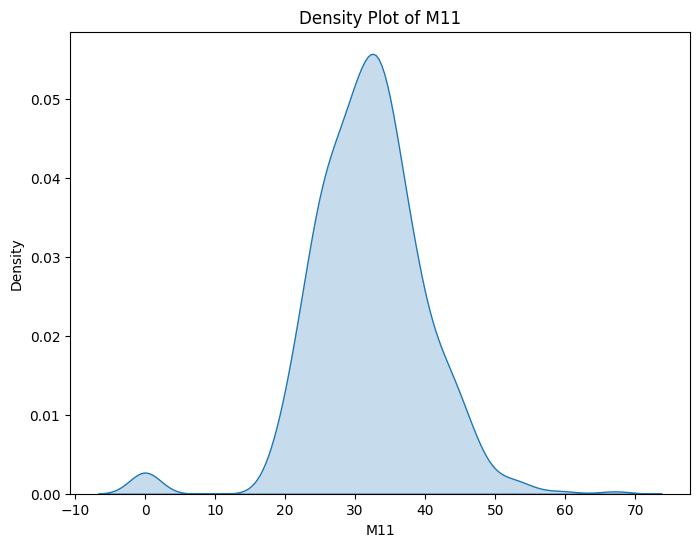

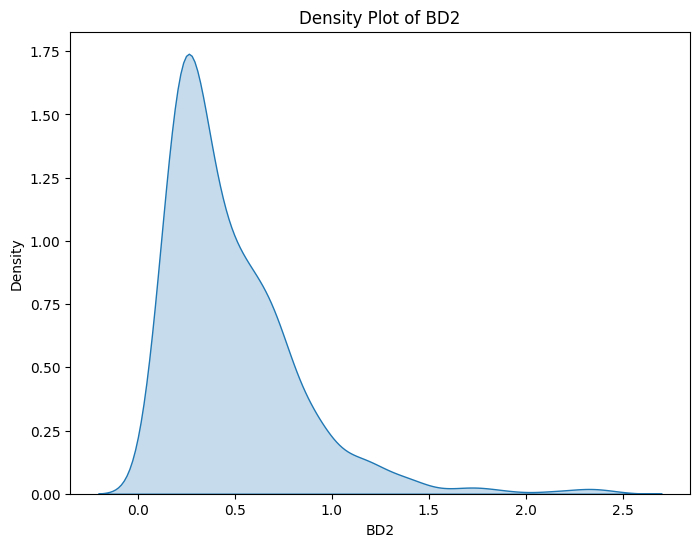

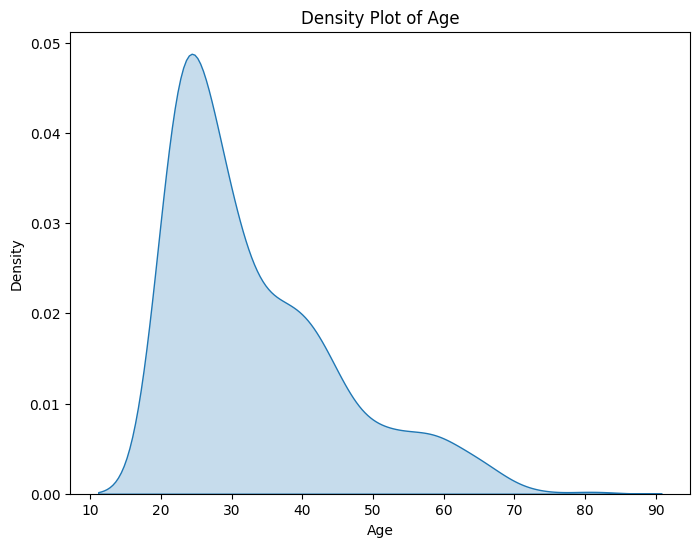

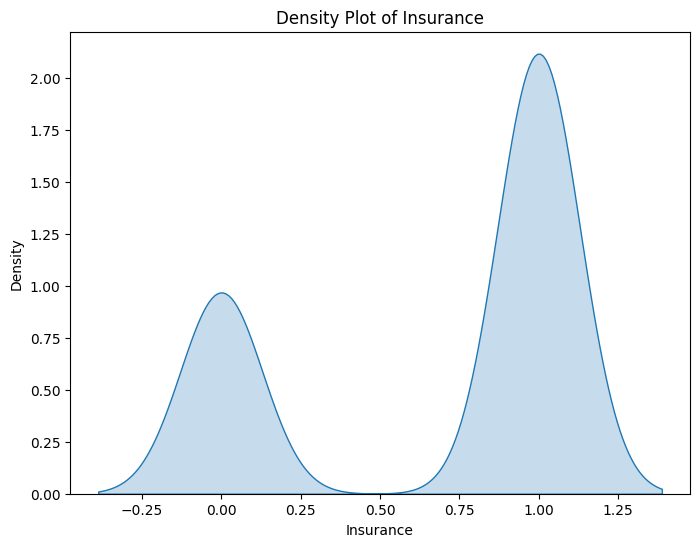

In [159]:

# Density Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

## Bivariate

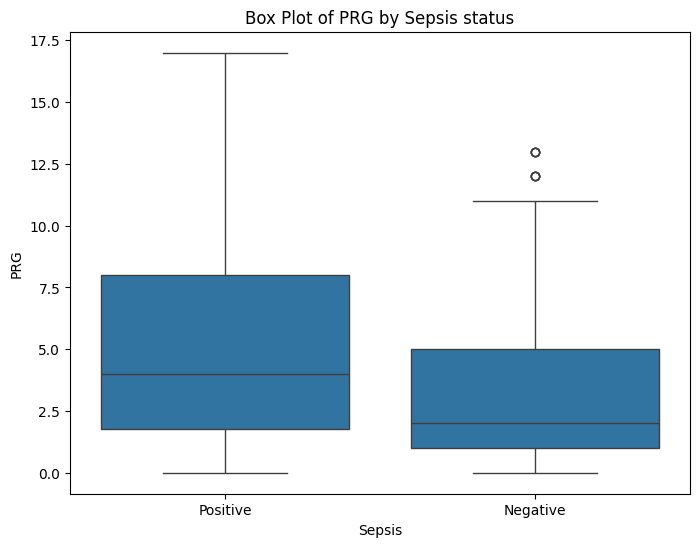

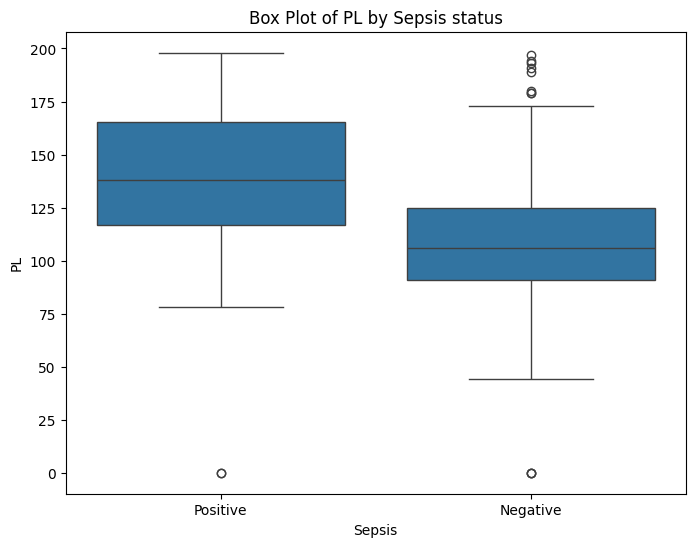

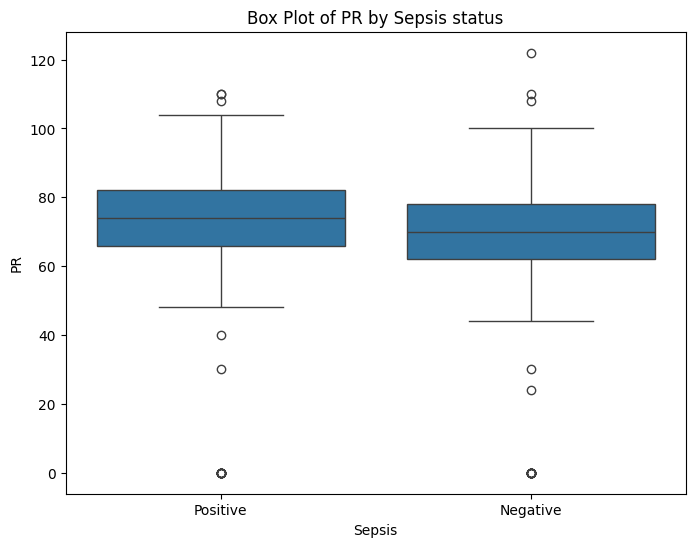

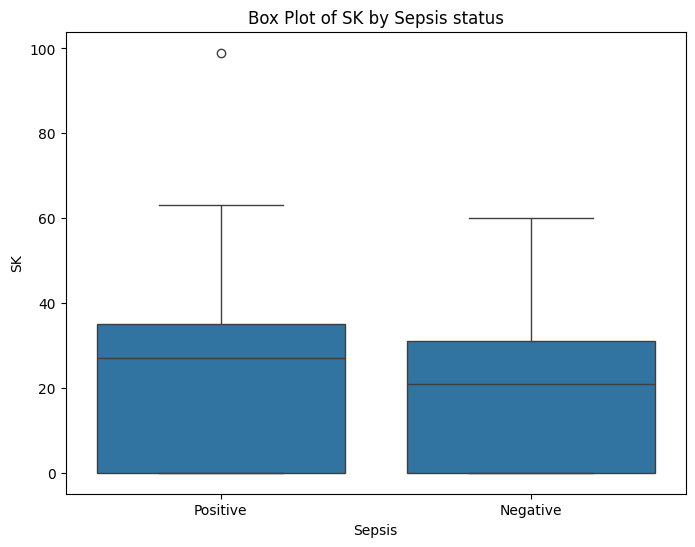

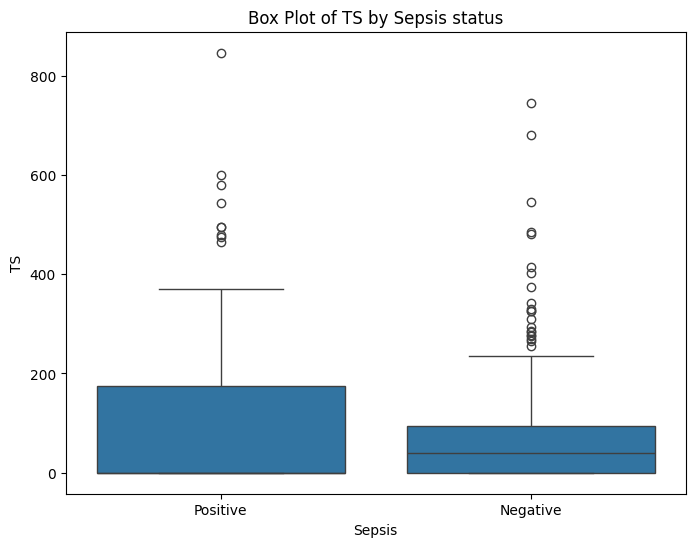

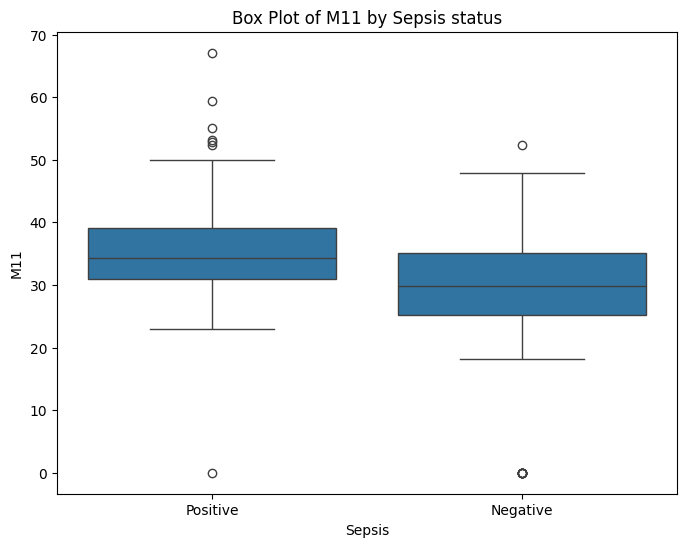

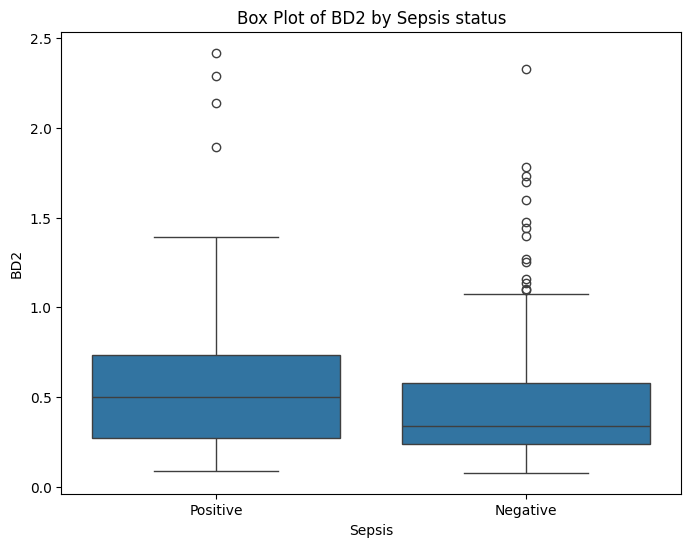

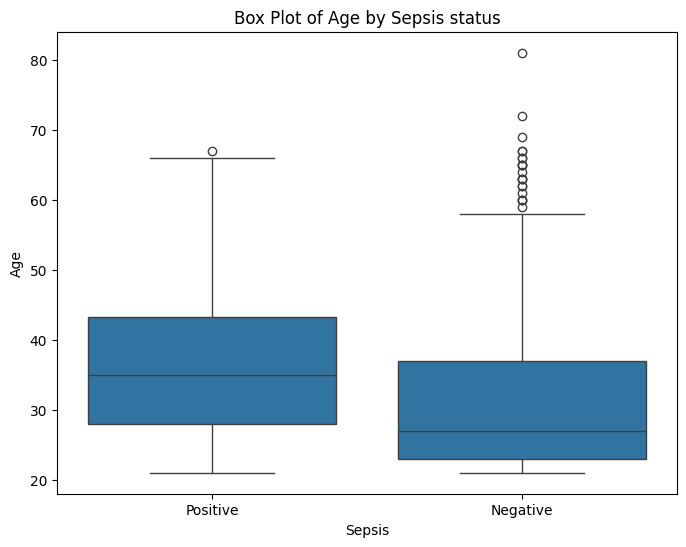

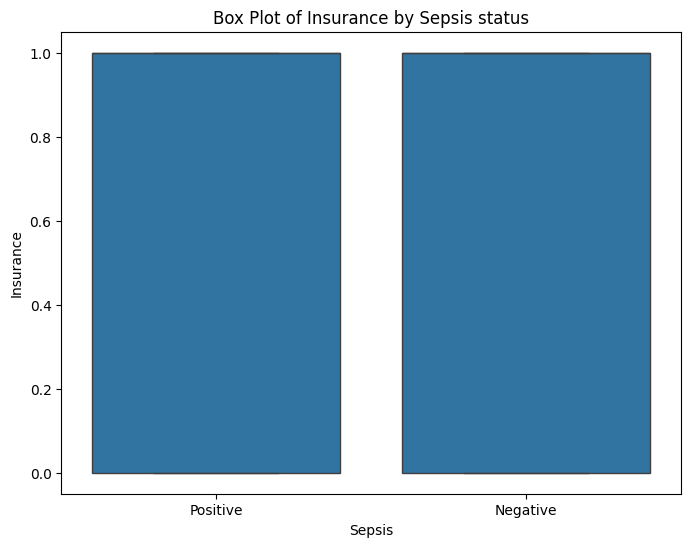

In [160]:
# Box Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Sepssis'], y=data[col])
    plt.title(f'Box Plot of {col} by Sepsis status')
    plt.xlabel('Sepsis')
    plt.ylabel(col)
    plt.show()


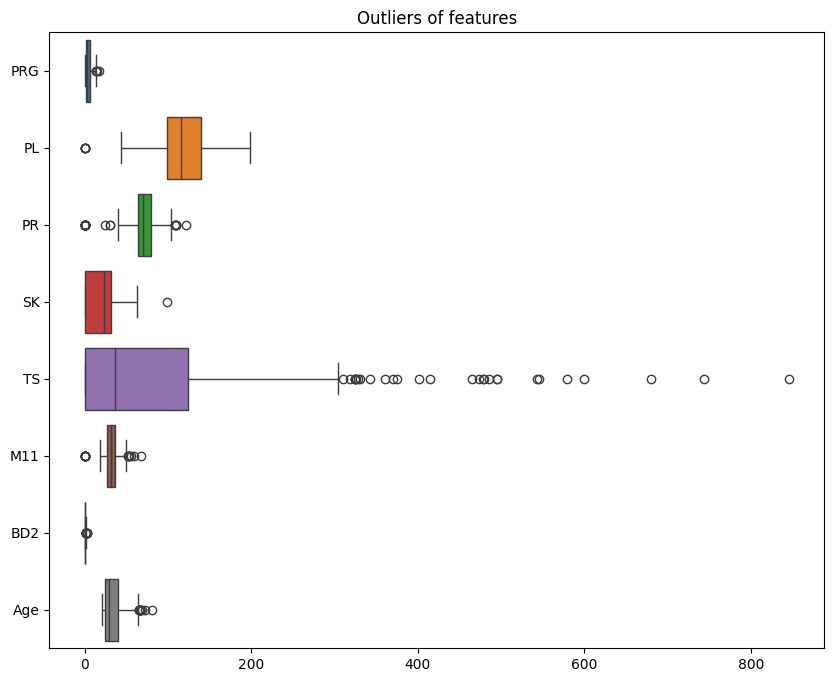

In [161]:
# check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=data.drop(['Insurance','Sepssis'],axis=1), orient='h')
plt.title('Outliers of features')
plt.show()

In [162]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


__Analytical Questions__

1. What is the Sepsis rate?

In [163]:
# Calculate the count of occurrences of sepsis
sepsis_counts = data['Sepssis'].value_counts()

sepsis_counts

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

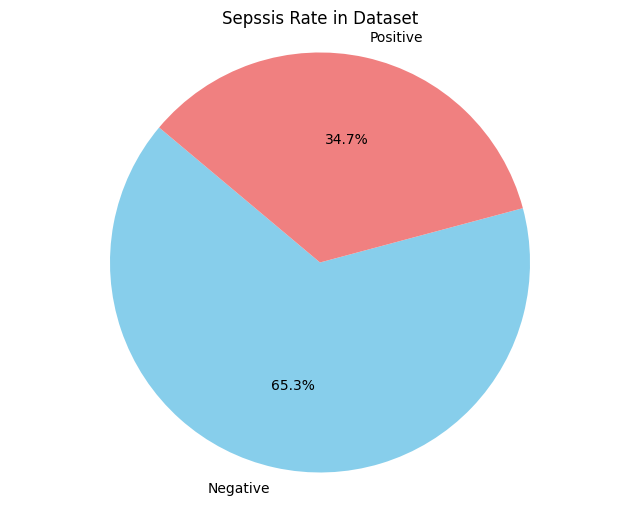

In [164]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sepsis_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Sepssis Rate in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

2.  How are the numerical variables correlated with each other?

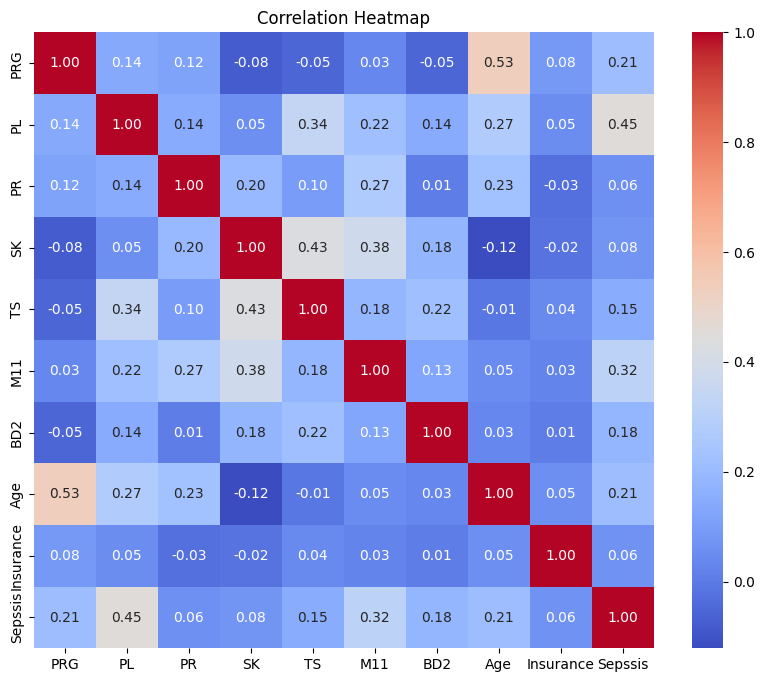

In [165]:
# convert Sepsis column to numeric column
data["Sepssis"]= data["Sepssis"].apply(lambda x: 1 if x=="Positive" else 0 )

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


3. What is the distribution of ages in the dataset?

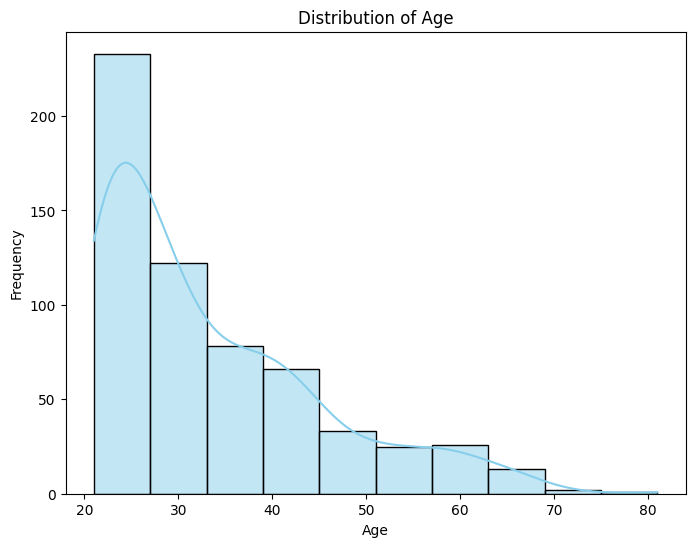

In [166]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


4.  How many patients have insurance?

In [167]:
count_insurance = data['Insurance'].sum()

count_insurance

411

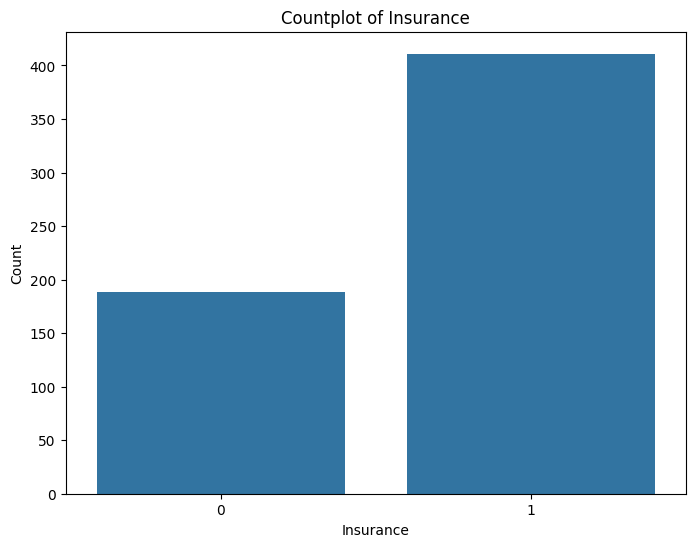

In [168]:
# visualize
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance', data=data)
plt.title('Countplot of Insurance')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.show()


5. How does insurance status relate to the occurrence of Sepsis?

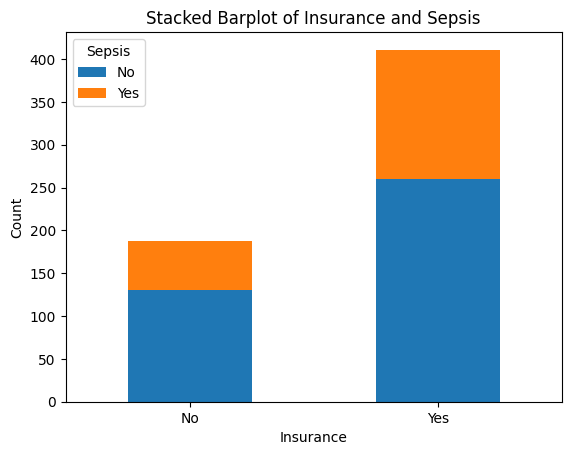

In [169]:
insurance_sepsis = data.groupby(['Insurance', 'Sepssis']).size().unstack()
insurance_sepsis.plot(kind='bar', stacked=True)
plt.title('Stacked Barplot of Insurance and Sepsis')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Sepsis', labels=['No', 'Yes'])
plt.show()


6. What is the distribution of plasma glucose concentration (PR) in the dataset?

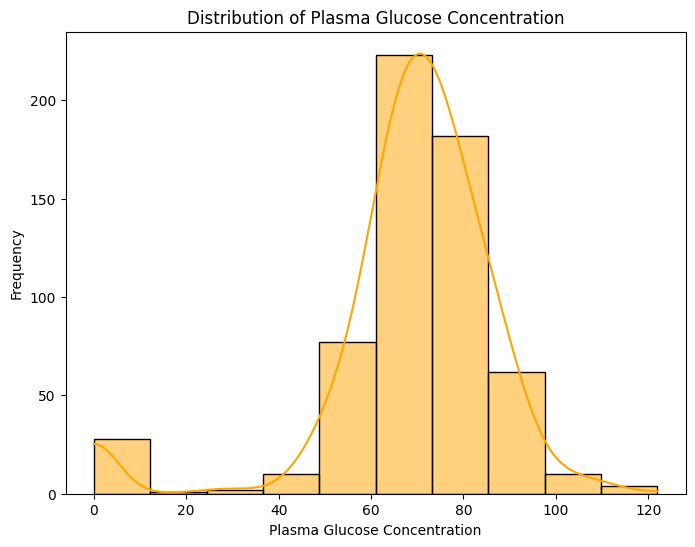

In [170]:
plt.figure(figsize=(8, 6))
sns.histplot(data['PR'], kde=True, bins=10, color='orange')
plt.title('Distribution of Plasma Glucose Concentration')
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('Frequency')
plt.show()


7. How does serum insulin (M11) vary between patients with and without sepsis?

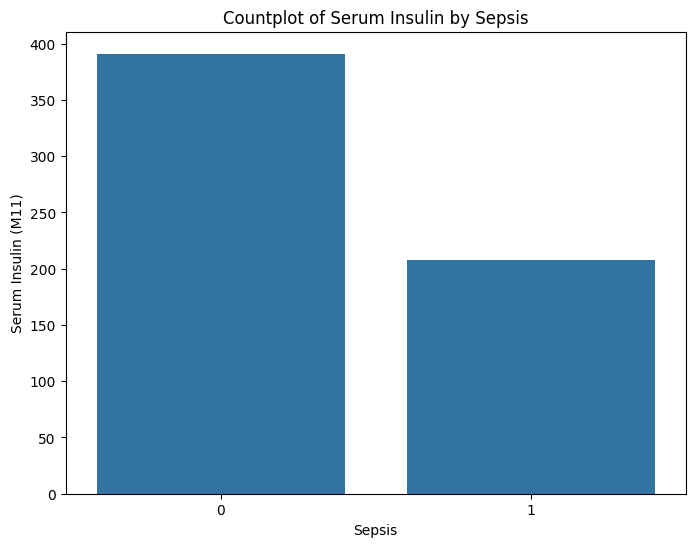

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepssis',  data=data)
plt.title('Countplot of Serum Insulin by Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Serum Insulin (M11)')
plt.show()


In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00
Sepssis,599.0,0.347245,0.476492,0.000,0.000,0.000,1.000,1.00


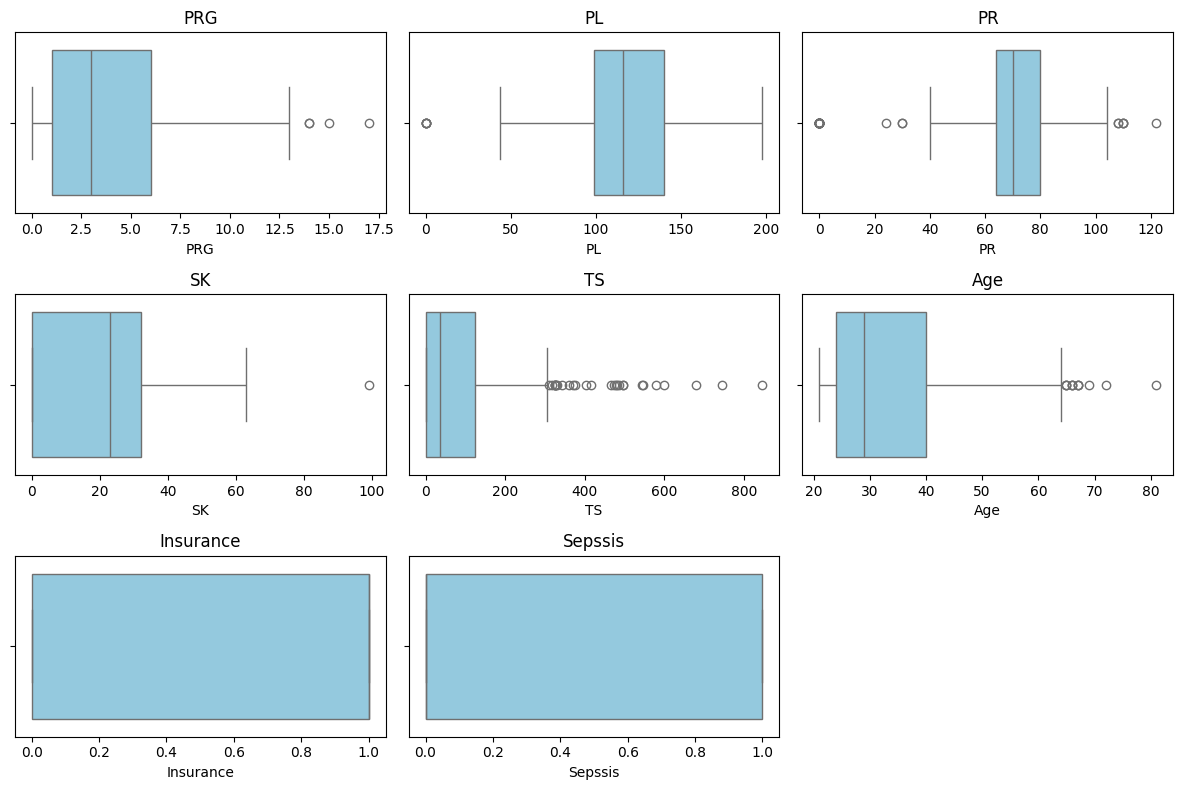

In [173]:
# Selecting numerical columns
columns = data.select_dtypes(include= 'int' ).columns

# Creating box plots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()


In [174]:
# Rename a column

data.rename(columns={"Sepssis":"Sepsis"}, inplace=True) 

data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
ICU200014,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,0
ICU200605,0,188,82,14,185,32.0,0.682,22,1,1
ICU200606,0,67,76,0,0,45.3,0.194,46,1,0


__Hypothesis Testing__

* Null Hypothesis (H0): There is no association between having insurance and the occurrence of sepsis.
* Alternative Hypothesis (H1): There is an association between having insurance and the occurrence of sepsis.

In [175]:
# Crosstabulation of Insurance and Sepsis
insurance_sepsis_cross_tab = pd.crosstab(data['Insurance'], data['Sepsis'])

insurance_sepsis_cross_tab

Sepsis,0,1
Insurance,,
0,131,57
1,260,151


In [176]:
# Chi-square test of independence
chi2, p_value, _, _ = stats.chi2_contingency(insurance_sepsis_cross_tab)

In [177]:
# Printing the results
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 2.0712782081677066
p-value: 0.1500956791860619


In [178]:
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to Reject the null hypothesis.")

Fail to Reject the null hypothesis.


 There is no association between having insurance and the occurrence of sepsis.

## DATA PREPARATION

In [179]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [180]:
# check for unique values
data["Sepsis"].unique()

array([1, 0], dtype=int64)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 67.6+ KB


## MODELING & EVALUATION

Split the dataset into features (X) and the target variable (y).

In [182]:
X = data.drop(columns= ['Sepsis','Insurance'],axis=1)

y = data['Sepsis']



Spilt data into training and evaluation

In [183]:
X_test,X_train, y_test,y_train = train_test_split(X,y, test_size=0.2, random_state=42 , stratify =y)

In [184]:
X_train 

,PRG,PL,PR,SK,TS,M11,BD2,Age
ID,,,,,,,,
ICU200042,3,88,58,11,54,24.8,0.267,22
ICU200162,9,156,86,28,155,34.3,1.189,42
ICU200417,0,101,62,0,0,21.9,0.336,25
ICU200254,2,146,76,35,194,38.2,0.329,29
ICU200172,0,114,80,34,285,44.2,0.167,27
...,...,...,...,...,...,...,...,...
ICU200527,7,125,86,0,0,37.6,0.304,51
ICU200104,2,142,82,18,64,24.7,0.761,21
ICU200506,5,110,68,0,0,26.0,0.292,30


In [185]:
y_train

ID
ICU200042    0
ICU200162    1
ICU200417    0
ICU200254    0
ICU200172    0
            ..
ICU200527    0
ICU200104    0
ICU200506    0
ICU200592    0
ICU200446    0
Name: Sepsis, Length: 120, dtype: int64

In [191]:
features = X.columns

features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

Create preprocessor

In [198]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'),features),
        ('scaler', RobustScaler(),features),
        ('log_transformations', FunctionTransformer(np.log1p),features)
    ]
)

create a list of models

In [202]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42))
    
]



In [203]:
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)


__Train Unbalanced Data__

In [208]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}

# loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',model)
    ])

In [209]:
# fit train data to pipeline
#pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                 ('log_transformations',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('feature importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000270078A4360>)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [210]:
# make prediction on the test set
y_pred = pipeline.predict(X_test)

